In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from modules.clustering import *

/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

## Random blobs Dataset

In [3]:
# generate a random dataset
X, y = make_blobs(n_samples=300, n_features= 4, centers=4, random_state=0)

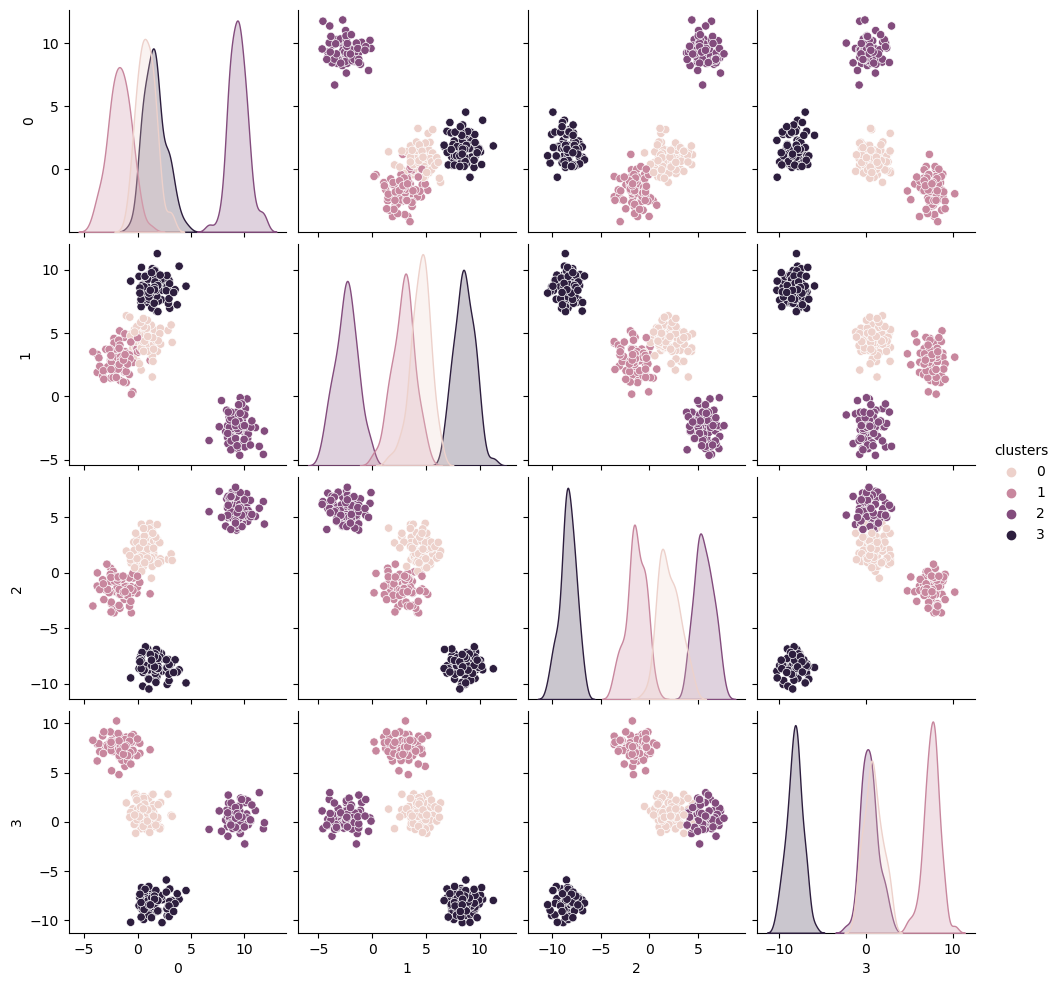

In [4]:
cPlot = ClustersPlot(X,y=y)

# plot features and labelled clusters
cPlot.plot_features()

In [5]:
cEval = ClusteringEvaluation(X)
cEval.dimensionnality_reduction()
cEval.preprocessing()
cEval.run_all_models()
best_model,df = cEval.find_best_model()
df

Input data shape: (300, 4)
Input data shape: (300, 4)
new data shape: (300, 2)
computing K-means
- optimal number of clusters: 55
computing hierarchical
- optimal number of clusters: 145
computing dbscan
eps distance: 0.14870411639505918
- optimal number of clusters: 12


/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score
Davies-Bouldin Index
Calinski-Harabasz Index
Number of clusters
Best model(s): dbscan
Models' score: {'dbscan': 10, 'hierarchical': 7, 'kmean': 6, 'consensus': 5}


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Number of clusters,score
kmean,0.374800,0.679937,2862.283832,55.0,6
hierarchical,0.369983,0.429305,5543.537644,145.0,7
dbscan,0.385181,0.428898,1263.270415,12.0,10
consensus,0.360653,0.640832,2551.516232,53.0,5


(300, 4)
(300, 2)


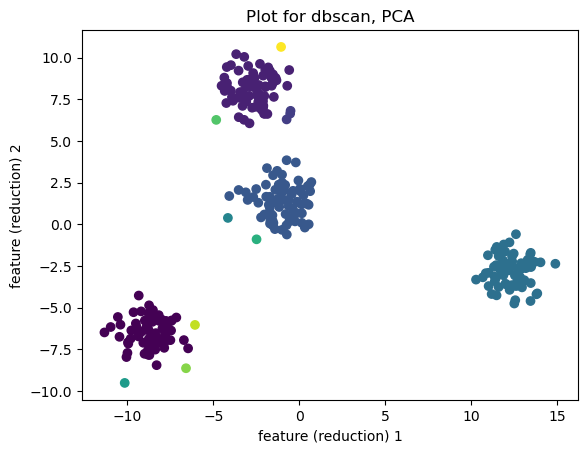

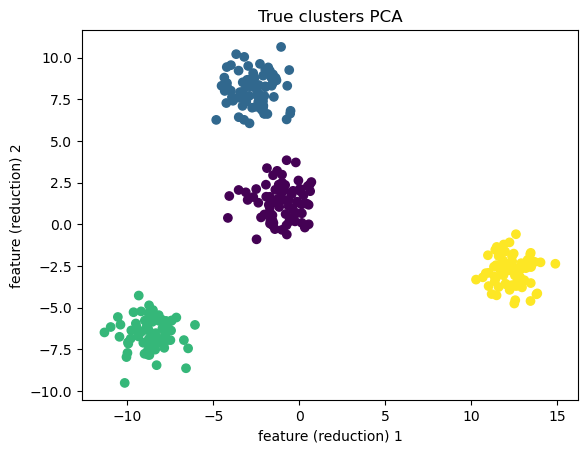

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


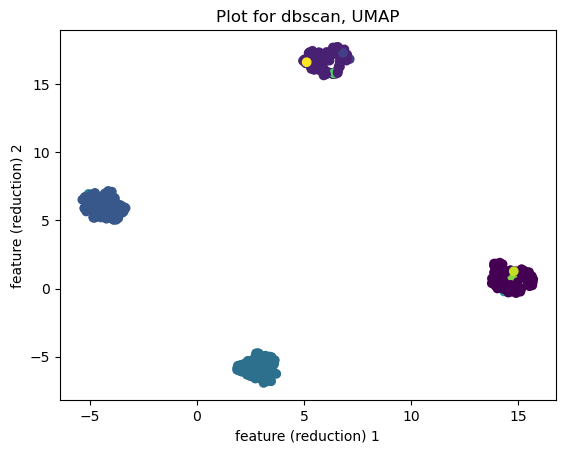

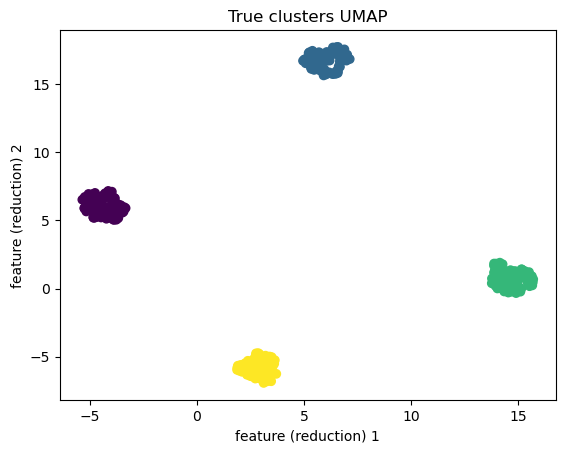

In [6]:
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

In [8]:
cEval = ClusteringEvaluation(X)
cEval.run_all_models()
best_model, df= cEval.find_best_model()
df

Input data shape: (300, 4)
computing K-means
- optimal number of clusters: 55
computing hierarchical
- optimal number of clusters: 276
computing dbscan
eps distance: 1.9069392781284848
- optimal number of clusters: 7


/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score
Davies-Bouldin Index
Calinski-Harabasz Index
Number of clusters
Best model(s): dbscan
Models' score: {'dbscan': 11, 'hierarchical': 7, 'kmean': 5, 'consensus': 4}


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Number of clusters,score
kmean,0.217541,1.043483,485.198800,55.0,5
hierarchical,0.062770,0.192680,1014.332135,276.0,7
dbscan,0.482220,0.467677,1232.460686,7.0,11
consensus,0.209105,1.028219,473.457082,55.0,4


(300, 4)
(300, 2)


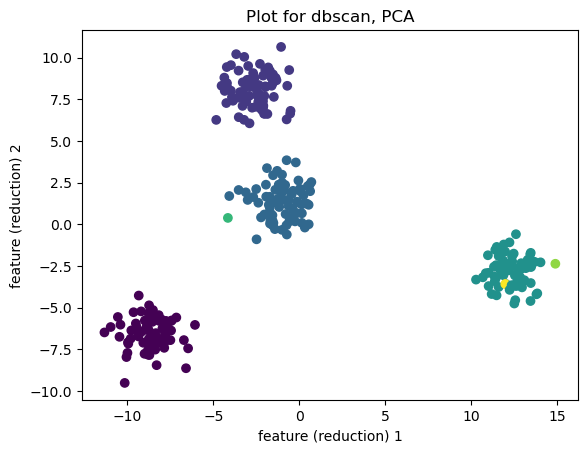

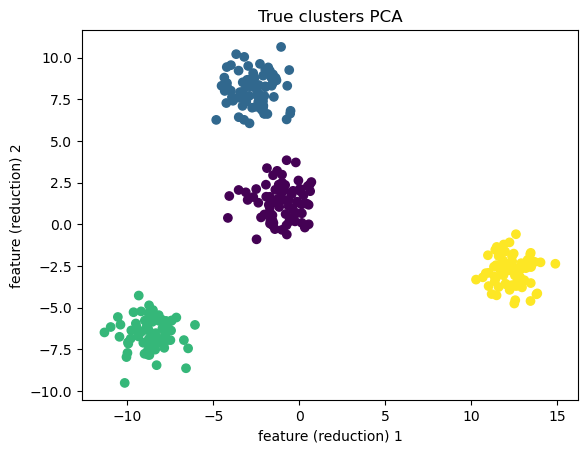

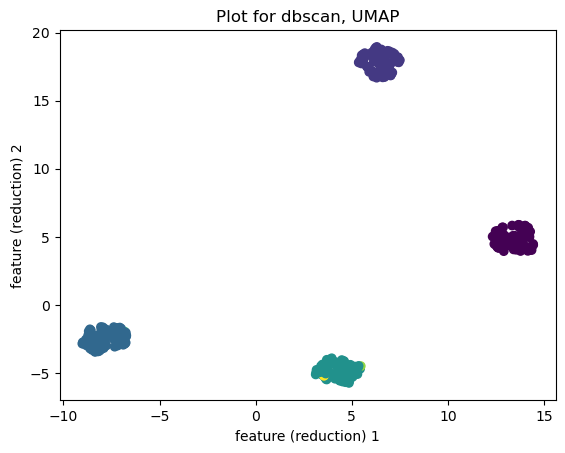

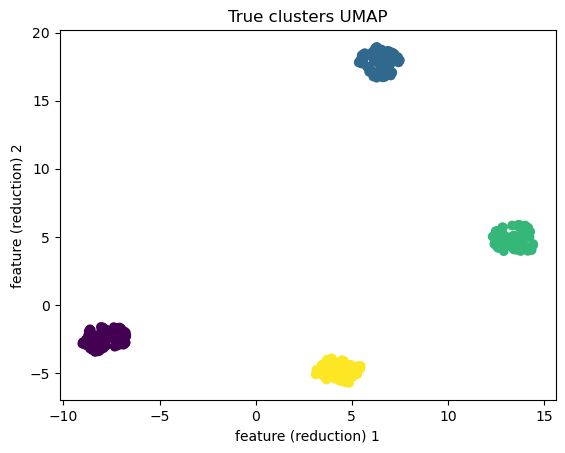

In [9]:
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

In [28]:
cEval = ClusteringEvaluation(X, max_clusters =8)
cEval.dimensionnality_reduction()
cEval.preprocessing()
cEval.run_all_models()
best_model,df = cEval.find_best_model()
df

Input data shape: (333, 4)
Input data shape: (333, 4)
new data shape: (333, 1)
computing K-means
- optimal number of clusters: 2
computing hierarchical
- optimal number of clusters: 8
computing dbscan
eps distance: 0.0685352220092213
- optimal number of clusters: 5


/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score
Davies-Bouldin Index
Calinski-Harabasz Index
Number of clusters
Best model(s): kmean
Models' score: {'kmean': 12.0, 'consensus': 12.0, 'hierarchical': 8.0, 'dbscan': 8.0}


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Number of clusters,score
kmean,0.631137,0.506086,915.498108,2.0,12.0
hierarchical,0.506716,0.524651,1976.508089,8.0,8.0
dbscan,0.020069,0.423662,15.757853,5.0,8.0
consensus,0.631137,0.506086,915.498108,2.0,12.0


(300, 4)
(300, 2)


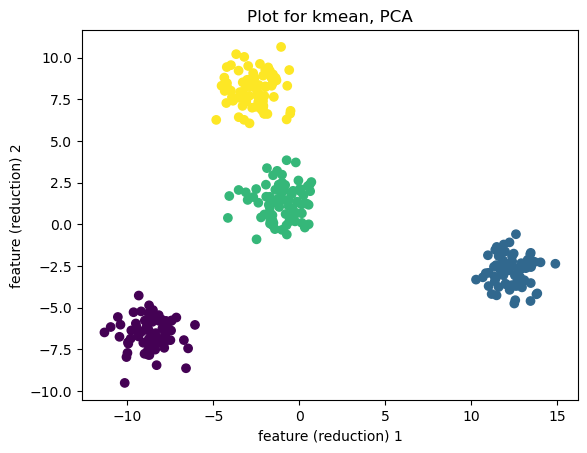

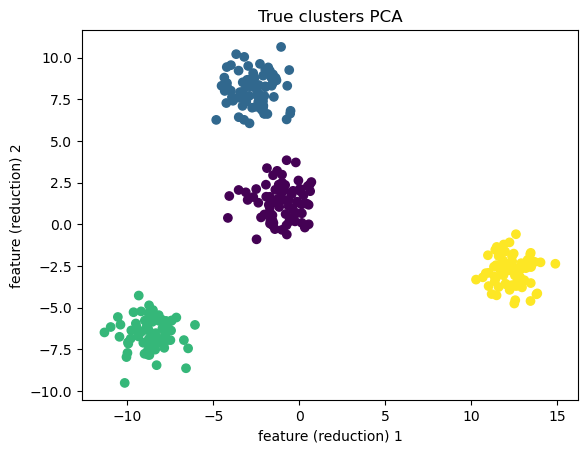

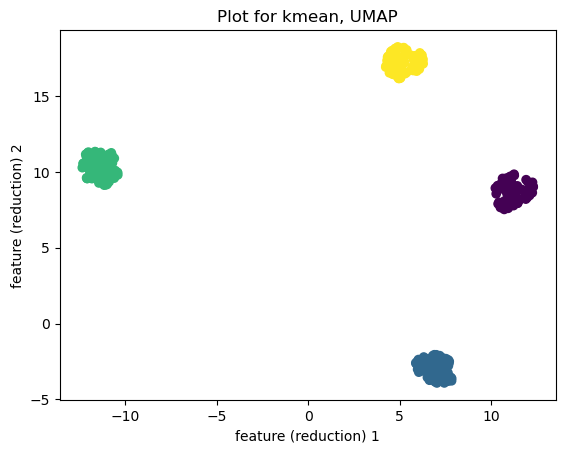

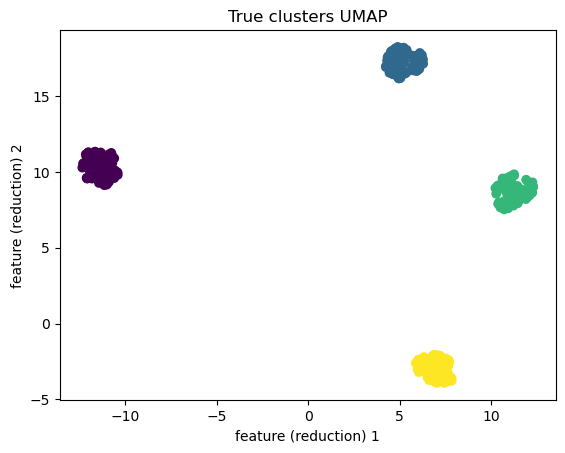

In [11]:
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

### Results

with or without preprocessing the dbscan seems to outperform the others models in this analysis

by giving a range within the number of clusters ( max_clusters ) the aglorithm seems to find stable points that are much more suitable

## Penguin data set

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


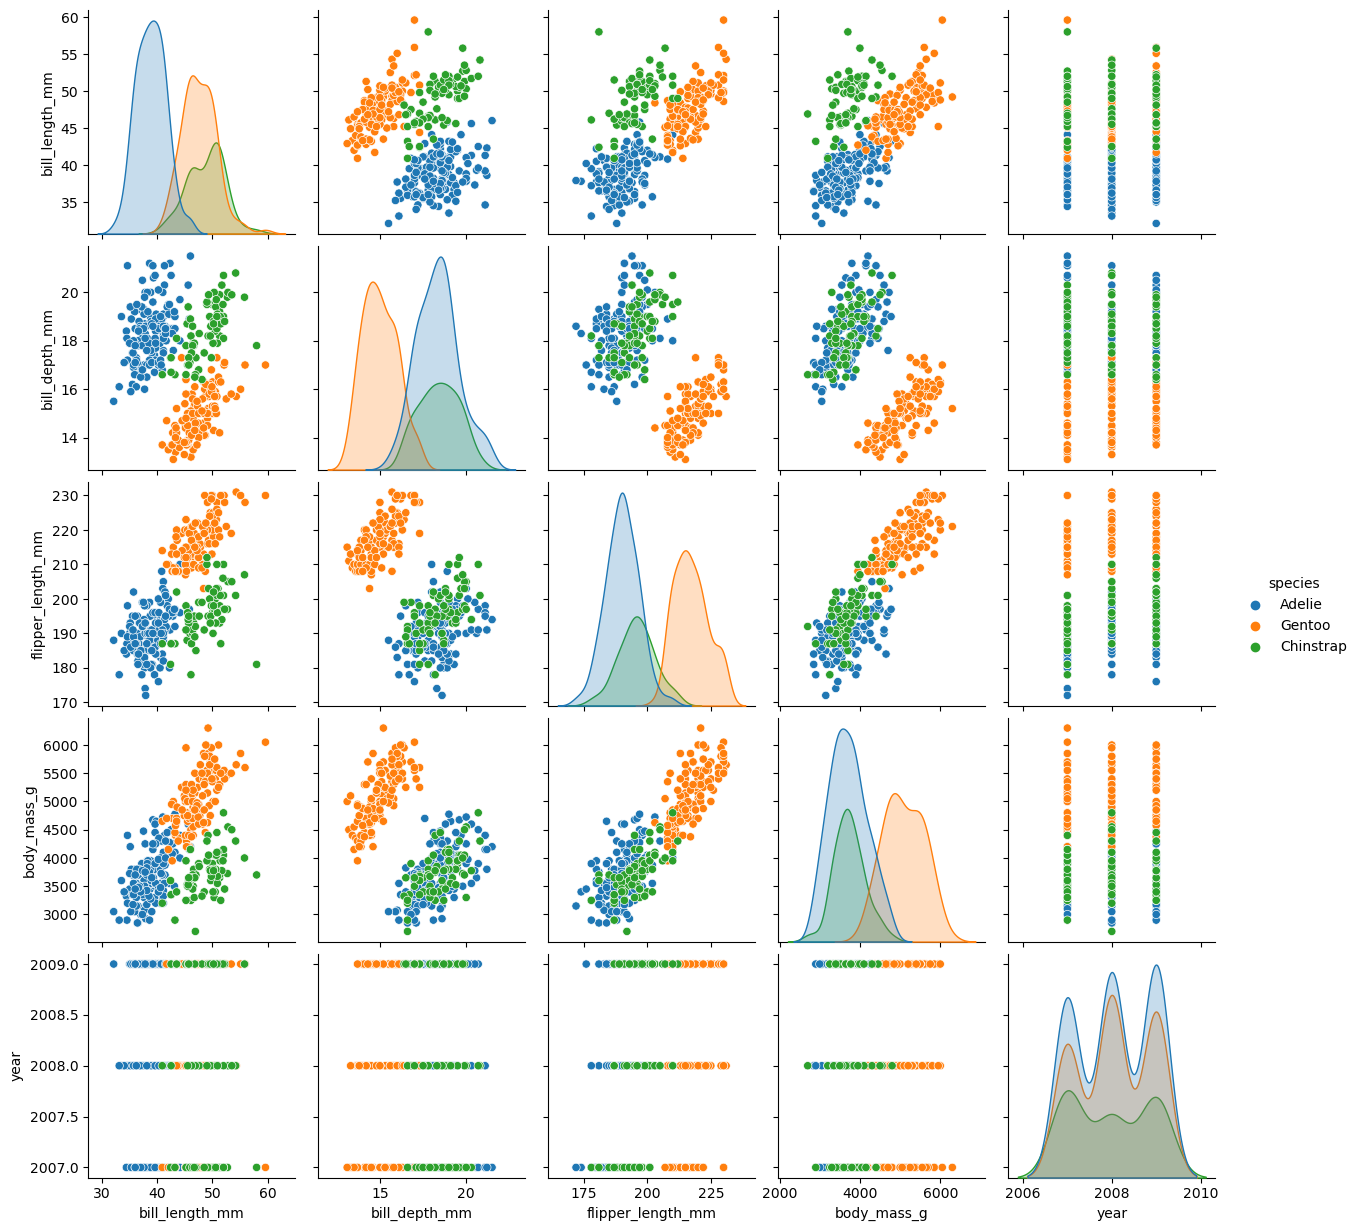

In [13]:
df = df.dropna()
sns.pairplot(df, hue='species')
plt.show()

In [14]:
X =  df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g",]].values
y =  df['species']

name_dict = {name: i for i, name in enumerate(set(y))}
y = [name_dict[name] for name in y]

In [29]:
cEval = ClusteringEvaluation(X, max_clusters =10)
cEval.preprocessing()
cEval.run_all_models()
best_model,df = cEval.find_best_model()
df

Input data shape: (333, 4)
computing K-means
- optimal number of clusters: 5
computing hierarchical
- optimal number of clusters: 10
computing dbscan
eps distance: 0.8047757747308593
- optimal number of clusters: 7


/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score
Davies-Bouldin Index
Calinski-Harabasz Index
Number of clusters
Best model(s): kmean
Models' score: {'kmean': 13.5, 'consensus': 12.5, 'dbscan': 8.0, 'hierarchical': 6.0}


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Number of clusters,score
kmean,0.374400,0.977716,395.990859,5.0,13.5
hierarchical,0.260992,1.257545,271.742844,10.0,6.0
dbscan,0.021736,0.663134,83.050502,7.0,8.0
consensus,0.374400,0.977716,395.990859,5.0,12.5


(333, 4)
(333, 2)


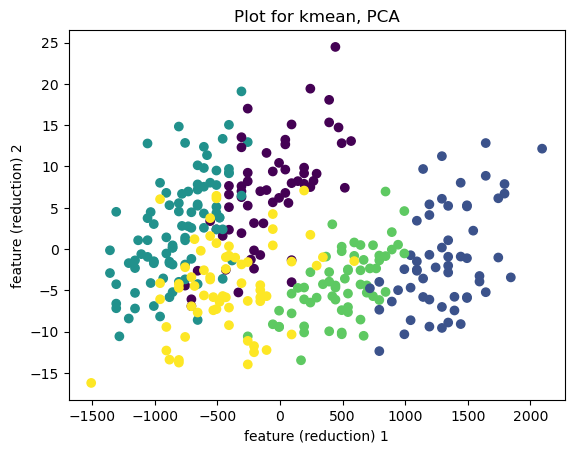

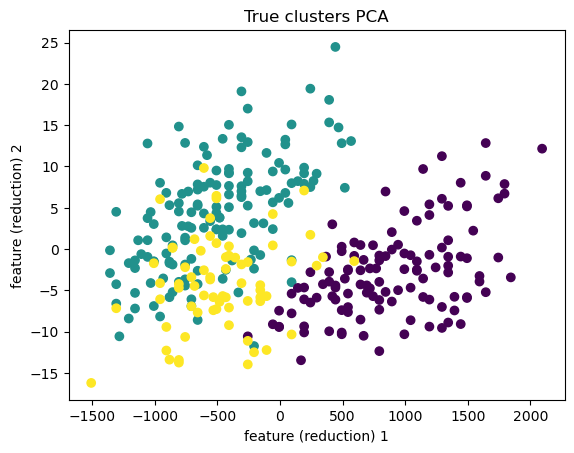

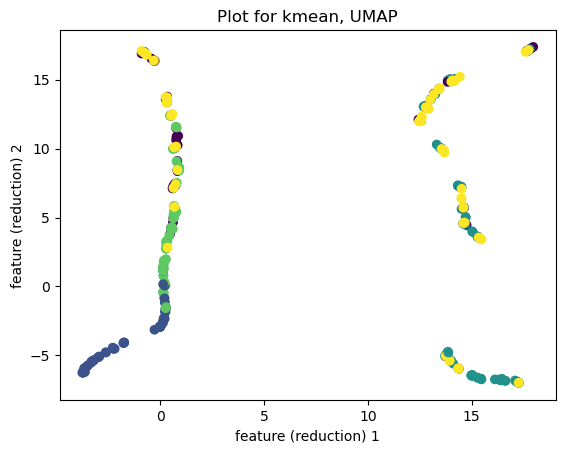

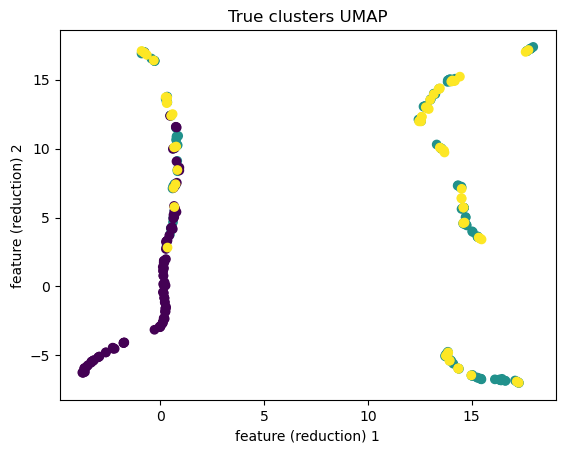

In [30]:
cPlot  = ClustersPlot(X=X, y=y)
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

##### we can further improve the clustering by analysing the different sex and islands 

### Results

The analysis done shows that two types of penguins seems to be splitted in two (most likely male an female). 

## Iris dataset 

In [31]:
from sklearn.datasets import load_iris
data = load_iris()

In [32]:
X = data.data
y = data.target

In [42]:
cEval = ClusteringEvaluation(X, max_clusters =10)
#cEval.dimensionnality_reduction()
cEval.preprocessing()
cEval.run_all_models()
best_model,df = cEval.find_best_model()
df

Input data shape: (150, 4)
Input data shape: (150, 4)
new data shape: (150, 2)
computing K-means
- optimal number of clusters: 4
computing hierarchical
- optimal number of clusters: 10
computing dbscan
eps distance: 0.44282468632874916
- optimal number of clusters: 8
Silhouette Score
Davies-Bouldin Index
Calinski-Harabasz Index
Number of clusters
Best model(s): kmean
Models' score: {'kmean': 12.5, 'consensus': 11.5, 'hierarchical': 8.0, 'dbscan': 8.0}


/opt/miniconda3/envs/clustering_comparator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Number of clusters,score
kmean,0.494409,0.648140,179.024272,4.0,12.5
hierarchical,0.399135,0.757290,197.132802,10.0,8.0
dbscan,0.324649,0.447823,36.397827,8.0,8.0
consensus,0.493027,0.584349,125.283873,4.0,11.5


(150, 4)
(150, 2)


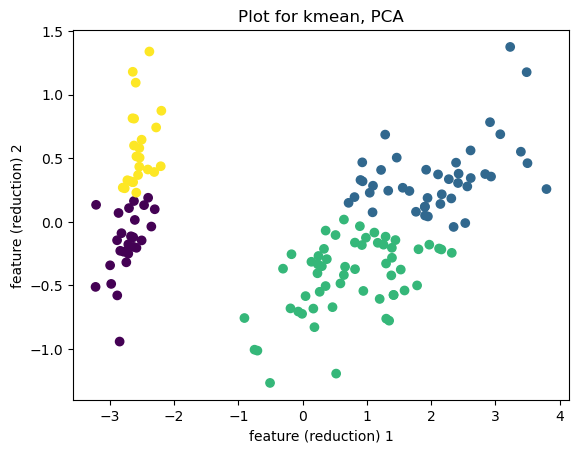

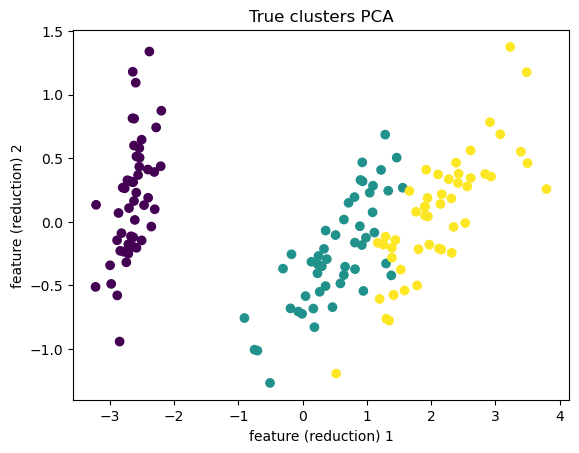

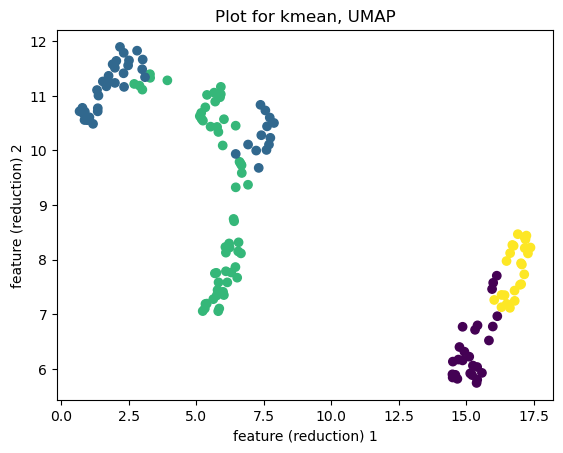

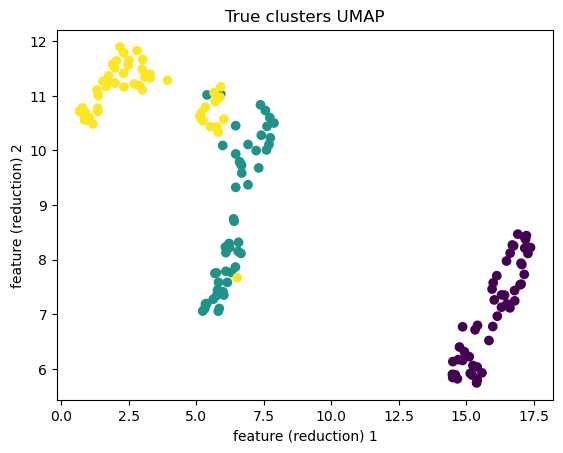

In [43]:
cPlot  = ClustersPlot(X=X, y=y)
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

(150, 4)
(150, 2)


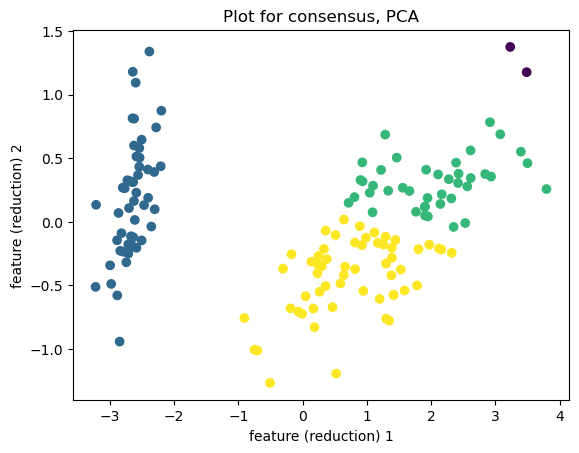

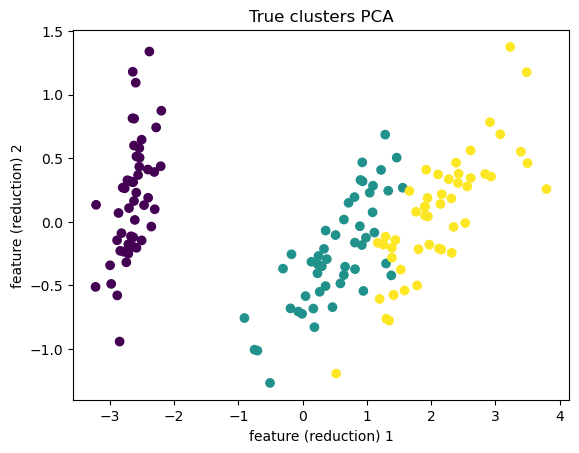

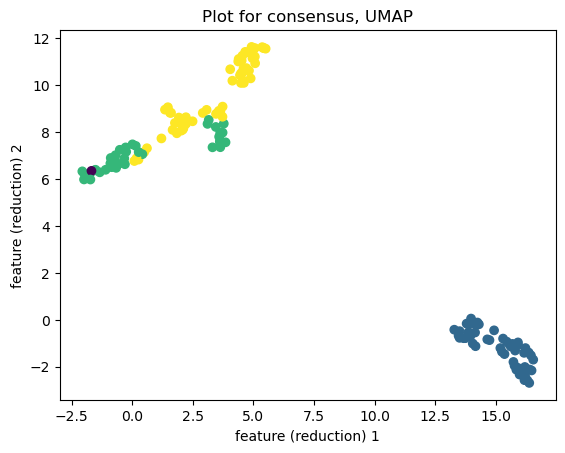

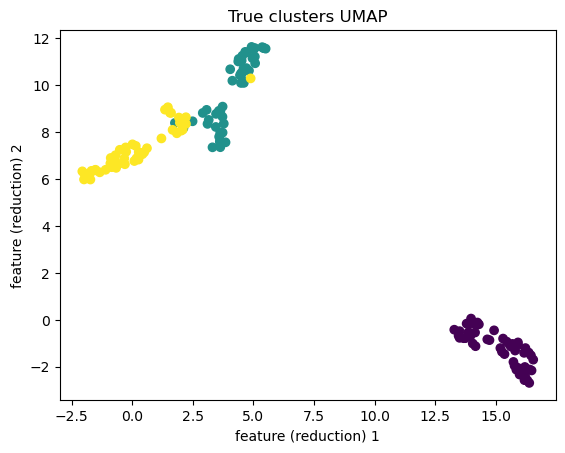

In [44]:
best_model = 'consensus'
cPlot  = ClustersPlot(X=X, y=y)
cPlot.plot_clusters(cEval.labels_models[best_model], best_model)

### Results 

Interestingly, the best algorithm doesn't manage to correctly split this dataset even under some initial feature reduction. Some more developped clustering alogrithm could be added to improve the performance of the consensus as well as the chances of finding the right clusters.  